In [21]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from pyearth import Earth

In [22]:
m = 1000
n = 5

X = np.random.normal(size=(m, n))

# Make X[:,1] binary
X[:, 1] = np.random.binomial(1, .5, size=m)

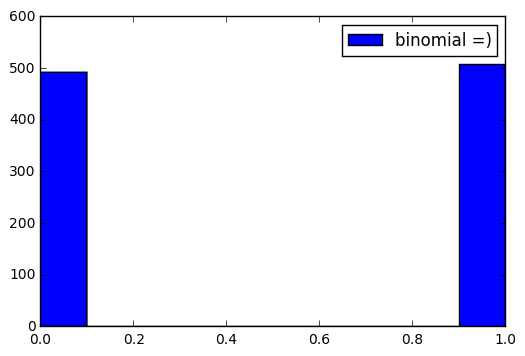

In [23]:
plt.hist(X[:,1], label="binomial =)")
plt.legend()

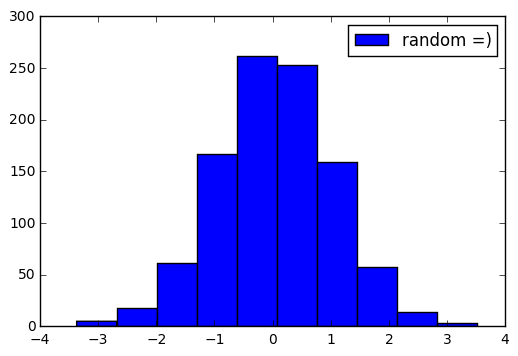

In [24]:
plt.hist(X[:,0], label="random =)")
plt.legend()

In [25]:
y = 2 * X[:, 0] + 3 * X[:, 1] + np.random.normal(size=m)

In [34]:
model = Earth(verbose=True).fit(X, y)

Beginning forward pass
---------------------------------------------------------------
iter  parent  var  knot  mse       terms  gcv    rsq    grsq   
---------------------------------------------------------------
0     -       -    -     7.345395  1      7.360  0.000  0.000  
1     0       0    -1    3.175124  2      3.197  0.568  0.566  
2     0       1    -1    0.927138  3      0.938  0.874  0.873  
3     0       4    -1    0.920370  4      0.936  0.875  0.873  
---------------------------------------------------------------
Stopping Condition 2: Improvement below threshold
Beginning pruning pass
--------------------------------------------
iter  bf  terms  mse   gcv    rsq    grsq   
--------------------------------------------
0     -   4      0.92  0.936  0.875  0.873  
1     3   3      0.93  0.938  0.874  0.873  
2     2   2      3.18  3.197  0.568  0.566  
3     1   1      7.35  7.360  0.000  0.000  
--------------------------------------------
Selected iteration: 0


In [35]:
# Print the model summary, showing linear terms
print(model.summary())

Earth Model
-------------------------------------
Basis Function  Pruned  Coefficient  
-------------------------------------
(Intercept)     No      0.0310291    
x0              No      2.01721      
x1              No      3.00654      
x4              No      0.0863474    
-------------------------------------
MSE: 0.9204, GCV: 0.9362, RSQ: 0.8747, GRSQ: 0.8728


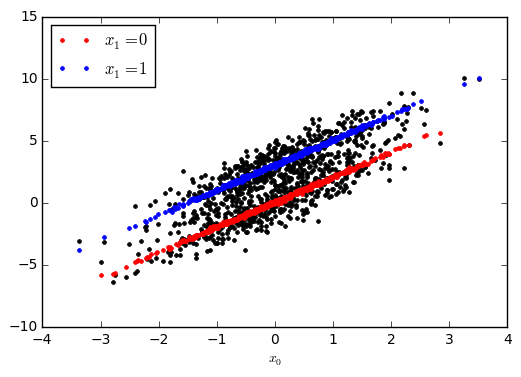

In [36]:
y_hat = model.predict(X)
plt.figure()
plt.plot(X[:, 0], y, 'k.')
plt.plot(X[X[:, 1] == 0, 0], y_hat[X[:, 1] == 0], 'r.', label='$x_1 = 0$')
plt.plot(X[X[:, 1] == 1, 0], y_hat[X[:, 1] == 1], 'b.', label='$x_1 = 1$')
plt.legend(loc='best')
plt.xlabel('$x_0$')

In [43]:
coef = model.coef_[0]
model.coef_

array([[ 0.03102912,  2.01720996,  3.00653892,  0.08634735]])

In [39]:
print X[0,:]
print y_hat[0]

[-3.37154745  1.         -0.11301362 -0.38367838 -0.58223077]
-3.81382514568


### Formula is: y = intercept + 2.017 x0 + 3.006 x1 + 0.086 x4

In [46]:
coef[0] + coef[1] * X[0,0] + coef[2] * X[0,1] + coef[3] * X[0,3]
# lol ok so that's how u generate it, it's just a linear multiplication with a lot of basis

-3.7966806719238155